In [1]:
import pandas as pd
import warnings
from sklearn.utils import ConvergenceWarning
import numpy as np
import requests
import re
import os
import glob
import csv
import numpy as np
import scipy, scipy.stats
import sklearn
from sklearn import *
lm=linear_model.LinearRegression()
import statsmodels.formula.api as sm
from itertools import cycle
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from numpy import genfromtxt
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\ProgramData\Anacon

In [2]:
#import os
homedir = os.path.expanduser("~")
path_to_midterm = homedir+"\\midterm"
print("Path: ",path_to_midterm)

Path:  C:\Users\Administrator\midterm


In [3]:
def performance_fillNA(perf_df):
    perf_df['curr_ln_delin_status'] = perf_df['curr_ln_delin_status'].fillna(0)
    perf_df['repurch_flag']=perf_df['repurch_flag'].fillna('Unknown')
    perf_df['mod_flag']=perf_df['mod_flag'].fillna('N')
    perf_df['zero_bal_cd']=perf_df['zero_bal_cd'].fillna(00)
    perf_df['zero_bal_eff_dt']=perf_df['zero_bal_eff_dt'].fillna('199601')
    perf_df['current_dupb']=perf_df['current_dupb'].fillna(0)
    perf_df['lst_pd_inst_duedt']=perf_df['lst_pd_inst_duedt'].fillna('199601')
    perf_df['mi_recoveries']=perf_df['mi_recoveries'].fillna(0)
    perf_df['net_sale_proceeds']=perf_df['net_sale_proceeds'].fillna('U')
    perf_df['non_mi_recoveries']=perf_df['non_mi_recoveries'].fillna(0)
    perf_df['expenses']=perf_df['expenses'].fillna(0)
    perf_df['legal_costs']=perf_df['legal_costs'].fillna(0)
    perf_df['maint_pres_costs']=perf_df['maint_pres_costs'].fillna(0)
    perf_df['taxes_and_insur']=perf_df['taxes_and_insur'].fillna(0)
    perf_df['misc_expenses']=perf_df['misc_expenses'].fillna(0)
    perf_df['actual_loss_calc']=perf_df['actual_loss_calc'].fillna(0)
    perf_df['mod_cost']=perf_df['mod_cost'].fillna(0)
    
    return perf_df

In [4]:
def changeperformancedatatype(perf_df):
        perf_df[['curr_ln_delin_status','loan_age','remng_mon_to_leg_matur','zero_bal_cd','current_dupb',\
                 'actual_loss_calc']] = perf_df[['curr_ln_delin_status','loan_age','remng_mon_to_leg_matur',\
                                                 'zero_bal_cd','current_dupb','actual_loss_calc']].astype('int64')

        perf_df[['mon_rpt_prd','zero_bal_eff_dt','lst_pd_inst_duedt']] = perf_df[['mon_rpt_prd','zero_bal_eff_dt',\
                                                                                  'lst_pd_inst_duedt']].astype('str')
        return perf_df

In [5]:
import pandas as pd
download_path = path_to_midterm #+"\\"+"Data\\" ##Changed
def constructperformancecsv(filename):##Changed
    print("Started",filename)
    writeHeader1 = True
    #filename = "HistoricalperformanceCombined.csv"
    final_sample = pd.DataFrame()
    for subdir,dirs, files in os.walk(download_path):
        for file in files:
            #print(file," ",filename)
            if filename == file: ##Changed
                temp_list = []
                chunksize = 10 ** 6
                for chunk in pd.read_csv(os.path.join(subdir,file) ,sep="|", \
                                         skipinitialspace=True, chunksize=chunksize, low_memory=False, header=None):
                    temp_list.append(chunk)
                print('DataFrame creation started!!')
                frames = []
                for df in temp_list:
                    frames.append(df)
                sample_df = pd.concat(frames)
                sample_df.columns = ['id_loan','mon_rpt_prd','current_aupb','curr_ln_delin_status',\
                                     'loan_age','remng_mon_to_leg_matur', 'repurch_flag','mod_flag', \
                                     'zero_bal_cd', 'zero_bal_eff_dt','current_int_rte','current_dupb',\
                                     'lst_pd_inst_duedt','mi_recoveries', 'net_sale_proceeds',\
                                     'non_mi_recoveries','expenses', 'legal_costs', 'maint_pres_costs',\
                                     'taxes_and_insur','misc_expenses','actual_loss_calc', 'mod_cost']
                print('DataFrame created!!')

                sample_df['curr_ln_delin_status'] = [999 if x=='R' else x for x in \
                                                   (sample_df['curr_ln_delin_status'].apply(lambda x: x))]
                sample_df['curr_ln_delin_status'] = [0 if x=='XX' else x for x in \
                                                   (sample_df['curr_ln_delin_status'].apply(lambda x: x))]
                sample_df = performance_fillNA(sample_df)
                sample_df = changeperformancedatatype(sample_df)
                
                sample_df['Year'] = ['19'+x if x=='99' else '20'+x for x in (sample_df['id_loan'].apply(lambda x: x[2:4]))]
                sample_df['Quarter'] =sample_df['id_loan'].apply(lambda x: x[4:6])
                print("Completed!!")                
                final_sample=pd.concat([final_sample, sample_df])
                
    return final_sample




In [ ]:
year = int(input("Enter the year:"))
Q1   = input("Enter the traning quarter")
Q2   = input("Enter the testing quarter")
fileName = "sample_svcg_"+str(year)+".txt"
Performance_data= constructperformancecsv(fileName)

In [50]:
def statusUpdate(df):
    df['delinquent'] = (df.curr_ln_delin_status > 0).astype(int)
    #df.drop('max_curr_ln_delin_status', axis = 1,inplace=True)
    df.drop('curr_ln_delin_status', axis = 1,inplace=True)
    #df.drop('Year',axis=1,inplace=True) #Duplicate
    #df.drop('Quarter',axis=1,inplace=True) #Duplicate
    return df

In [51]:
Performance_data = statusUpdate(Performance_data)

In [9]:
def splitting(df,label):
    df_features = df.ix[:, df.columns != label]
    df_target = df.ix[:, df.columns == label]
    return df_features,df_target

In [10]:
def findCorrelation(df):
    # calculate the correlation matrix
    corr = df.corr()
    print("--------------- Correlation with target variable-----------")
    print(corr['delinquent'])

In [82]:
def dataSplit(Performance_data,label,year,Quarter1,Quarter2):
    #label = 'delinquent'
    Hist_numeric_2005_Q1 = Performance_data[(Performance_data['Year']==str(year)) & (Performance_data['Quarter']==Quarter1)]
    Hist_numeric_2005_Q1=Hist_numeric_2005_Q1._get_numeric_data()
    findCorrelation(Hist_numeric_2005_Q1)

    Hist_numeric_2005_Q2 = Performance_data[(Performance_data['Year']==str(year)) & (Performance_data['Quarter']==Quarter2)]
    Hist_numeric_2005_Q2=Hist_numeric_2005_Q2._get_numeric_data()
    #print(Hist_numeric_2005_Q2.head())

    Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target = splitting(Hist_numeric_2005_Q1,label)
    Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target = splitting(Hist_numeric_2005_Q2,label)
    return Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target,\
    Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target,\
    Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target

In [48]:
Performance_data.tail()

,id_loan,mon_rpt_prd,current_aupb,curr_ln_delin_status,loan_age,remng_mon_to_leg_matur,repurch_flag,mod_flag,zero_bal_cd,zero_bal_eff_dt,...,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_and_insur,misc_expenses,actual_loss_calc,mod_cost,Year,Quarter
3574029,F105Q4404780,201508,107846.21,0,117,243,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574030,F105Q4404780,201509,107565.45,0,118,242,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574031,F105Q4404780,201510,107283.69,0,119,241,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574032,F105Q4404780,201511,107000.93,0,120,240,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574033,F105Q4404780,201512,0.00,0,121,239,N,N,1,201512.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4


In [84]:

traning_feature,traning_label,testing_feature,testing_label,testing_feture,testing_Label\
=dataSplit(Performance_data,'delinquent',year,Q1,Q2)
print("Traning",traning_feature.shape)
print("Testing",testing_feature.shape)

--------------- Correlation with target variable-----------
current_aupb              0.013046
loan_age                  0.150777
remng_mon_to_leg_matur    0.018246
zero_bal_cd               0.082250
current_int_rte          -0.024759
current_dupb              0.012682
mi_recoveries             0.044816
non_mi_recoveries         0.022754
expenses                 -0.082486
legal_costs              -0.087452
maint_pres_costs         -0.061489
taxes_and_insur          -0.063170
misc_expenses            -0.052228
actual_loss_calc         -0.088495
mod_cost                  0.013923
delinquent                1.000000
Name: delinquent, dtype: float64
Traning (923079, 15)
Testing (897465, 15)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
# To select the feature with elemination technique
def featureSelectionRFE(selector,data):
    decision = selector.support_
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            important_feature.append(col)
        iter+=1
    data_new = data.filter(important_feature,axis=1)
    return data_new

In [14]:
def featureSelectionKSelect(selector,data):
    decision = selector.get_support()
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            important_feature.append(col)
        iter+=1
    data = data[important_feature]
    return data

In [15]:
def confusionMatrixPrint(acc,z):
    print("")
    print("----------------------Confusion Matrix--------------------")
    print("                    Actual Result          ")
    print("                   0                  1          ")
    print("Expected  0        ",acc[0][0],"        ",acc[0][1])
    print("")
    print("result    1        ",acc[1][0],"        ",acc[1][1])
    print("")
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         1717118          0

result    1         76750          1062

Accuracy: 95.7240672338


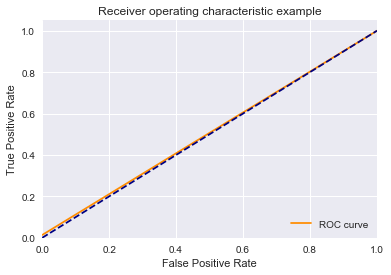

In [16]:
from sklearn.feature_selection import RFE
'''
This function builds a ligistic regression model using the features selected by **RFE** method
'''

def logistic_regressor(traning_feature, traning_label, testing_feature, testing_label):
    logreg = linear_model.LogisticRegression(max_iter=20)
    selector = RFE(logreg, 5, step=1)
    selector.fit(traning_feature, traning_label)
    testing_feature = featureSelectionRFE(selector, testing_feature)
    traning_feature = featureSelectionRFE(selector, traning_feature)
    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(traning_feature, traning_label)
    z=logreg.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
logistic_regressor(traning_feature, traning_label, testing_feature, testing_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         858552          7

result    1         38367          539

Accuracy: 95.7241786588


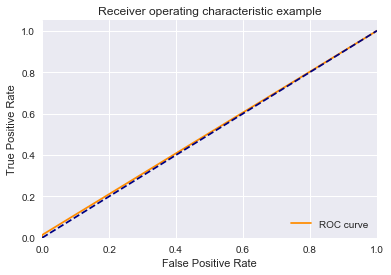


----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         882209          2

result    1         40364          504

Accuracy: 95.6270265059


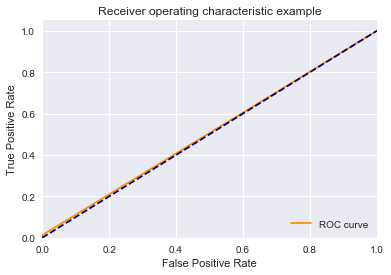

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
'''
This function builds a ligistic regression model using the features selected by **SelectKbest**
'''
def logistic_regressor(traning_feature, traning_label, testing_feature, testing_label):
    logreg = linear_model.LogisticRegression(max_iter=20)
    selector = SelectKBest(f_classif, k=5)
    selector.fit(traning_feature, traning_label)
    testing_feature = featureSelectionKSelect(selector, testing_feature)
    traning_feature = featureSelectionKSelect(selector, traning_feature)
    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(traning_feature, traning_label)
    z=logreg.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
logistic_regressor(traning_feature, traning_label, testing_feature, testing_label)

Accuracy: 57.004871739


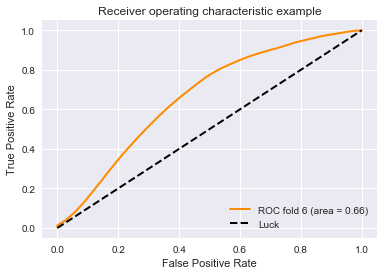

In [18]:
'''
This is a logistic regressor model with the balanced class dataset, 
this was done to remove any bias towards a class (This dataset is biased toward class0)
'''
cv = StratifiedKFold(n_splits=6)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
X = pd.concat([traning_feature,testing_feature]).values
y = pd.concat([traning_label,testing_label]).values.flatten()
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
classifier = linear_model.LogisticRegression(class_weight='balanced',max_iter=20)
i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    z=classifier.predict(traning_feature)
    result = np.sum(traning_label.values.flatten() == z)/z.size
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    i += 1

plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (6, roc_auc))

   
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')


print("Accuracy:",result*100)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

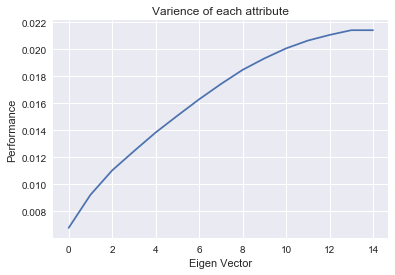

In [20]:
'''
This function computes the variance in the selected feature
'''

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

def start(data):
    X = data.values
    X=scale(X)


    #Find the varience
    pca=PCA(n_components=15)
    pca.fit(X)
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    var=pca.explained_variance_
    eigen_val = var
    eigen_val=eigen_val/700
    for index in range(1,len(eigen_val)):
        eigen_val[index]+=eigen_val[index-1]
    plt.plot(eigen_val)
    plt.title("Varience of each attribute")
    plt.xlabel("Eigen Vector")
    plt.ylabel("Performance")
    plt.plot()
    plt.show()
start(traning_feature)

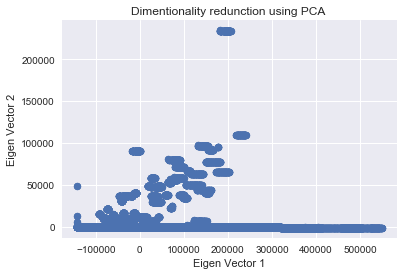

In [21]:
'''
This function attmepts to visualize the multi-dimentional data
by projecting it in eigen  domain.
'''
pca = PCA(n_components=2)
X = traning_feature
#To project the data into the first 2 eigen vectors
Y_sklearn =pca.fit_transform(X)
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1])
plt.xlabel("Eigen Vector 1")
plt.ylabel("Eigen Vector 2")
plt.title("Dimentionality redunction using PCA ")
plt.show()

In [85]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


# Ramdom forest
def Random_forest_classification(training_feature, traning_label, testing_feature, testing_label):
    
    # Creating the model
    rf = RandomForestClassifier(n_estimators=100,class_weight={0:1,1:0.001},n_jobs=-1)
    
    # Traning the model with traning data
    rf.fit(training_feature, traning_label)
    
    # Testing the model with the testing data
    z=rf.predict(testing_feature)
    
    #Computing the confusion matrix
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    
    fpr, tpr, _ = roc_curve(testing_label,z)

    plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.plot([0, 0], [0, 1], color='darkorange')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    Act_del = np.count_nonzero(testing_label)
    Pred_del =  np.count_nonzero(z)
    length = z.size
    tp_del = cm[0][0]
    fp_del = cm[1][0]
    return Act_del, Pred_del, length, tp_del, fp_del
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         882211          0

result    1         701          40167

Accuracy: 99.9240585042


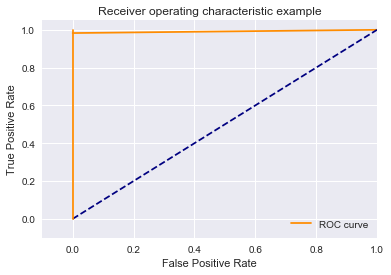

(40868, 40167, 923079, 882211, 701)

In [86]:
#Random_forest_classification(traning_feature, traning_label,testing_feture, testing_Label)



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         853490          5069

result    1         12837          26069

Accuracy: 98.0048247007


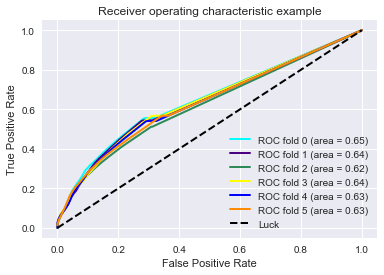

In [90]:
cv = StratifiedKFold(n_splits=6)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
X = pd.concat([traning_feature,testing_feature]).values
y = pd.concat([traning_label,testing_label]).values.flatten()
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
classifier = RandomForestClassifier(n_estimators=100,class_weight={0:1,1:0.001},n_jobs=-1)
i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    z=classifier.predict(testing_feature)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    cm=confusion_matrix(testing_label,z)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1



confusionMatrixPrint(cm) 
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')


print("Accuracy:",result*100)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         858550          9

result    1         38361          545

Accuracy: 95.7246243586


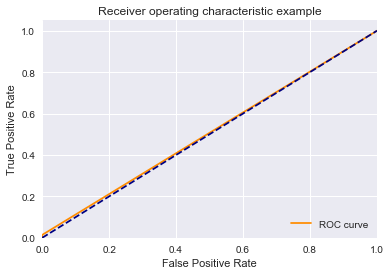

In [87]:
def Neural_net(training_feature, traning_label, testing_feature, testing_label):
    nn = MLPClassifier(solver='adam', alpha=1e-6,hidden_layer_sizes=(10, 2), random_state=3, max_iter=300,warm_start=True)

    # we create an instance of Neighbours Classifier and fit the data.
    nn.fit(training_feature, traning_label)
    z=nn.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
Neural_net(traning_feature, traning_label, testing_feature, testing_label)

In [232]:
newDF = pd.DataFrame(columns=['Quarter','Number of Actual Delinquents','Number of Predicted Delinquents',\
                              'Number of records in the dataset','Number of Delinquents properly classified',\
                             'Number of nondelinquents improperly classified as delinquents'])

In [233]:
#call the data downloading function


In [291]:
def preprocess(fileName,year,Quater1,Quater2):
    print("working on",year," ",Quater1," ",Quater2)
    Performance_data=constructperformancecsv(fileName)
    Performance_data = statusUpdate(Performance_data)
    traning_feature,traning_label,testing_feature,testing_label,_,_=dataSplit(Performance_data,'delinquent',year,Quater1,Quater2)
    Act_del, Pred_del, length, tp_del, fp_del= Random_forest_classification(traning_feature,\
                                                                            traning_label, testing_feature, testing_label)
    newDF.loc[len(newDF.index)]=[str(Quater2)+str(year),Act_del, Pred_del, length, tp_del, fp_del]
    
def calculateMatrix():
    Quater=['Q1','Q2','Q3','Q4']
    iter=0
    for year in range(1999,2016):
        for q in range(3):
            fileName = "sample_svcg_"+str(year)+".txt"
            Quarter1 = Quater[q]
            Quarter2 = Quater[q+1]
            preprocess(fileName,year,Quarter1,Quarter2)
        
    newDF.to_csv('delinquents_matrix.csv',index=False)
    

        
        
    

    

In [228]:
import os, zipfile
def unzipFiles():
    dir_name = path_to_midterm+"\\"+"Data\\"
    extension = ".zip"

    os.chdir(dir_name) # change directory from working dir to dir with files

    for item in os.listdir(dir_name): # loop through items in dir
        if item.endswith(extension): # check for ".zip" extension
            file_name = os.path.abspath(item) # get full path of files
            zip_ref = zipfile.ZipFile(file_name) # create zipfile object
            zip_ref.extractall(dir_name) # extract file to dir
            zip_ref.close() # close file
            os.remove(file_name) # delete zipped file
unzipFiles()        

working on 1999   Q1   Q2
Started sample_svcg_1999.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.040470
loan_age                  0.116241
remng_mon_to_leg_matur   -0.103458
zero_bal_cd               0.058613
current_int_rte           0.028189
current_dupb             -0.000278
mi_recoveries             0.035329
non_mi_recoveries         0.023477
expenses                 -0.046770
legal_costs              -0.037974
maint_pres_costs         -0.033585
taxes_and_insur          -0.013608
misc_expenses             0.003715
actual_loss_calc         -0.046764
mod_cost                  0.001384
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      42058.58        42                     317            0   
1      42011.81        43                     316            0   
2      41964.77        44                     315            0   
3      41917.46        45                     314            0   
4      41869.88        46                     313            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            6.875             0            0.0                0.0       0.0   
1            6.875             0            0.0                0.0       0.0   
2            6.875             0            0.0                0.0       0.0   
3            6.875             0            0.0                0.0       0.0   
4            6.875             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

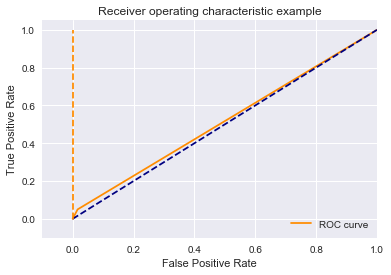

working on 1999   Q2   Q3
Started sample_svcg_1999.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.059406
loan_age                  0.132708
remng_mon_to_leg_matur   -0.118330
zero_bal_cd               0.060548
current_int_rte           0.017960
current_dupb              0.000678
mi_recoveries             0.041374
non_mi_recoveries         0.022758
expenses                 -0.066846
legal_costs              -0.050744
maint_pres_costs         -0.035779
taxes_and_insur          -0.033095
misc_expenses            -0.042696
actual_loss_calc         -0.048640
mod_cost                  0.008608
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
702692     161560.91        34                     326            0   
702693     161560.91        35                     325            0   
702694     161560.91        36                     324            0   
702695     161213.70        37                     323            0   
702696     161036.83        38                     322            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
702692            6.875             0            0.0                0.0   
702693            6.875             0            0.0                0.0   
702694            6.875             0            0.0                0.0   
702695            6.875             0            0.0                0.0   
702696            6.875             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
702692       0.0          0.0               0.0       

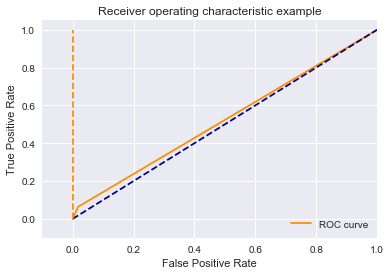

working on 1999   Q3   Q4
Started sample_svcg_1999.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.040718
loan_age                  0.166546
remng_mon_to_leg_matur   -0.145441
zero_bal_cd               0.064507
current_int_rte           0.023814
current_dupb              0.001392
mi_recoveries             0.046612
non_mi_recoveries         0.023183
expenses                 -0.067947
legal_costs              -0.052638
maint_pres_costs         -0.038304
taxes_and_insur          -0.033830
misc_expenses            -0.042757
actual_loss_calc         -0.052093
mod_cost                  0.007358
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1343157     178343.84        31                     329            0   
1343158     178167.72        32                     328            0   
1343159          0.00        33                     327            1   
1343160     127381.57        34                     326            0   
1343161     127247.39        35                     325            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1343157            7.125             0            0.0                0.0   
1343158            7.125             0            0.0                0.0   
1343159            7.125             0            0.0                0.0   
1343160            6.875             0            0.0                0.0   
1343161            6.875             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1343157       0.0          0.0           

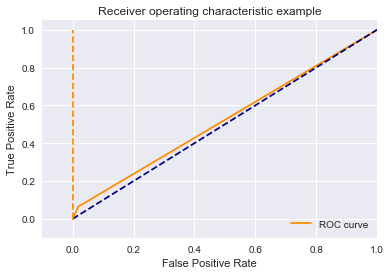

working on 2000   Q1   Q2
Started sample_svcg_2000.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.042889
loan_age                  0.194910
remng_mon_to_leg_matur   -0.165437
zero_bal_cd               0.067365
current_int_rte           0.021355
current_dupb              0.042953
mi_recoveries             0.045093
non_mi_recoveries         0.030388
expenses                 -0.060179
legal_costs              -0.049204
maint_pres_costs         -0.031853
taxes_and_insur          -0.026244
misc_expenses            -0.046379
actual_loss_calc         -0.053265
mod_cost                  0.011176
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0     187380.71        24                     336            0   
1     187380.71        25                     335            0   
2     187203.14        26                     334            0   
3     187024.52        27                     333            0   
4     186844.84        28                     332            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            7.125             0            0.0                0.0       0.0   
1            7.125             0            0.0                0.0       0.0   
2            7.125             0            0.0                0.0       0.0   
3            7.125             0            0.0                0.0       0.0   
4            7.125             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

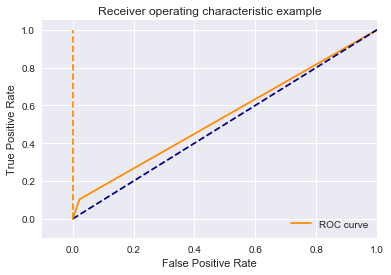

working on 2000   Q2   Q3
Started sample_svcg_2000.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.038076
loan_age                  0.183168
remng_mon_to_leg_matur   -0.173244
zero_bal_cd               0.070368
current_int_rte           0.044046
current_dupb              0.004520
mi_recoveries             0.067316
non_mi_recoveries         0.036682
expenses                 -0.078863
legal_costs              -0.054495
maint_pres_costs         -0.041218
taxes_and_insur          -0.032951
misc_expenses            -0.040898
actual_loss_calc         -0.055382
mod_cost                  0.009918
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
377438      96242.75        22                     338            0   
377439      96110.25        23                     337            0   
377440      96023.05        24                     336            0   
377441      95935.31        25                     335            0   
377442      95847.03        26                     334            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
377438            7.375             0            0.0                0.0   
377439            7.375             0            0.0                0.0   
377440            7.375             0            0.0                0.0   
377441            7.375             0            0.0                0.0   
377442            7.375             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
377438       0.0          0.0               0.0       

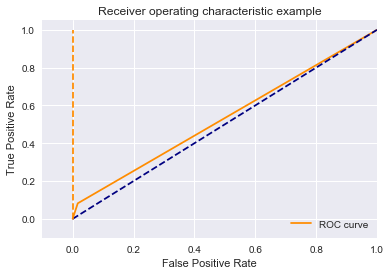

working on 2000   Q3   Q4
Started sample_svcg_2000.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.047730
loan_age                  0.197393
remng_mon_to_leg_matur   -0.183702
zero_bal_cd               0.074576
current_int_rte           0.036952
current_dupb              0.021859
mi_recoveries             0.053996
non_mi_recoveries         0.037732
expenses                 -0.082318
legal_costs              -0.063637
maint_pres_costs         -0.048340
taxes_and_insur          -0.043870
misc_expenses            -0.049026
actual_loss_calc         -0.067460
mod_cost                  0.011673
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
691793     162124.94        20                     340            0   
691794     161976.32        21                     339            0   
691795     161826.76        22                     338            0   
691796     161676.26        23                     337            0   
691797     161524.82        24                     336            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
691793             7.55             0            0.0                0.0   
691794             7.55             0            0.0                0.0   
691795             7.55             0            0.0                0.0   
691796             7.55             0            0.0                0.0   
691797             7.55             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
691793       0.0          0.0               0.0       

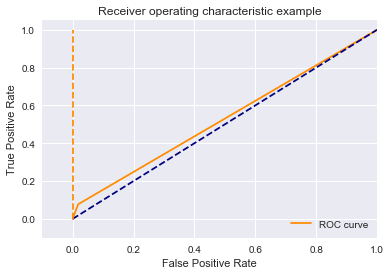

working on 2001   Q1   Q2
Started sample_svcg_2001.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.046660
loan_age                  0.118104
remng_mon_to_leg_matur   -0.105524
zero_bal_cd               0.074938
current_int_rte           0.053208
current_dupb              0.000246
mi_recoveries             0.052884
non_mi_recoveries         0.037894
expenses                 -0.066585
legal_costs              -0.067024
maint_pres_costs         -0.052246
taxes_and_insur          -0.047587
misc_expenses            -0.007277
actual_loss_calc         -0.064785
mod_cost                  0.011114
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      71966.12        11                     349            0   
1      71966.12        12                     348            0   
2      71230.94        13                     347            0   
3      71230.94        14                     346            0   
4      70860.07        15                     345            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            7.125             0            0.0                0.0       0.0   
1            7.125             0            0.0                0.0       0.0   
2            7.125             0            0.0                0.0       0.0   
3            7.125             0            0.0                0.0       0.0   
4            7.125             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

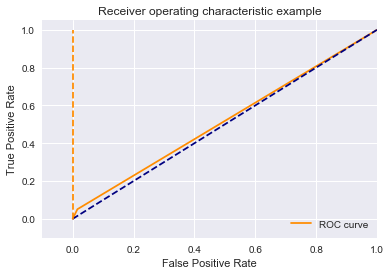

working on 2001   Q2   Q3
Started sample_svcg_2001.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.049019
loan_age                  0.153703
remng_mon_to_leg_matur   -0.135538
zero_bal_cd               0.067606
current_int_rte           0.059645
current_dupb              0.014553
mi_recoveries             0.042193
non_mi_recoveries         0.026459
expenses                 -0.078780
legal_costs              -0.060296
maint_pres_costs         -0.048783
taxes_and_insur          -0.052132
misc_expenses            -0.045549
actual_loss_calc         -0.067020
mod_cost                  0.011277
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
419969     189840.72         7                     353            0   
419970     189840.72         8                     352            0   
419971     189680.49         9                     351            0   
419972     189519.31        10                     350            0   
419973     189357.17        11                     349            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
419969            7.125             0            0.0                0.0   
419970            7.125             0            0.0                0.0   
419971            7.125             0            0.0                0.0   
419972            7.125             0            0.0                0.0   
419973            7.125             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
419969       0.0          0.0               0.0       

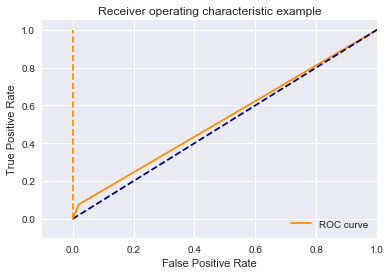

working on 2001   Q3   Q4
Started sample_svcg_2001.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.056841
loan_age                  0.146280
remng_mon_to_leg_matur   -0.123866
zero_bal_cd               0.076645
current_int_rte           0.050815
current_dupb              0.023341
mi_recoveries             0.065111
non_mi_recoveries         0.034803
expenses                 -0.083655
legal_costs              -0.077124
maint_pres_costs         -0.053415
taxes_and_insur          -0.058533
misc_expenses            -0.063629
actual_loss_calc         -0.072331
mod_cost                  0.009659
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
842702      51633.74         7                     353            0   
842703      51633.74         8                     352            0   
842704      51528.96         9                     351            0   
842705      51477.49        10                     350            0   
842706      51425.70        11                     349            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
842702            7.375             0            0.0                0.0   
842703            7.375             0            0.0                0.0   
842704            7.375             0            0.0                0.0   
842705            7.375             0            0.0                0.0   
842706            7.375             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
842702       0.0          0.0               0.0       

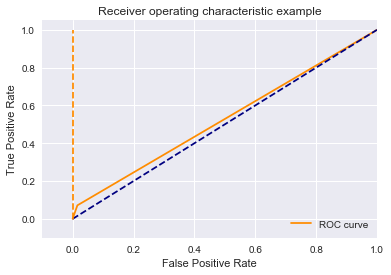

working on 2002   Q1   Q2
Started sample_svcg_2002.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.050497
loan_age                  0.140853
remng_mon_to_leg_matur   -0.109328
zero_bal_cd               0.073377
current_int_rte           0.040064
current_dupb              0.003845
mi_recoveries             0.063070
non_mi_recoveries         0.032697
expenses                 -0.078273
legal_costs              -0.078322
maint_pres_costs         -0.055812
taxes_and_insur          -0.055949
misc_expenses            -0.062130
actual_loss_calc         -0.074600
mod_cost                  0.009703
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0       39000.0         0                     360            0   
1       38000.0         1                     359            0   
2       38000.0         2                     358            0   
3       38000.0         3                     357            0   
4       38000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0             7.25             0            0.0                0.0       0.0   
1             7.25             0            0.0                0.0       0.0   
2             7.25             0            0.0                0.0       0.0   
3             7.25             0            0.0                0.0       0.0   
4             7.25             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

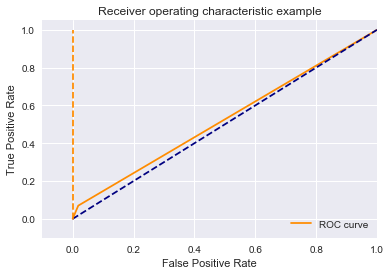

working on 2002   Q2   Q3
Started sample_svcg_2002.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.034496
loan_age                  0.127572
remng_mon_to_leg_matur   -0.102346
zero_bal_cd               0.075235
current_int_rte           0.039052
current_dupb              0.007886
mi_recoveries             0.061484
non_mi_recoveries         0.035772
expenses                 -0.080017
legal_costs              -0.082088
maint_pres_costs         -0.059990
taxes_and_insur          -0.060963
misc_expenses            -0.057794
actual_loss_calc         -0.072539
mod_cost                  0.006205
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
453787      105000.0         0                     360            0   
453788      105000.0         1                     359            0   
453789      105000.0         2                     358            0   
453790      105000.0         3                     357            0   
453791           0.0         4                     356            1   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
453787             7.24             0            0.0                0.0   
453788             7.24             0            0.0                0.0   
453789             7.24             0            0.0                0.0   
453790             7.24             0            0.0                0.0   
453791             7.24             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
453787       0.0          0.0               0.0       

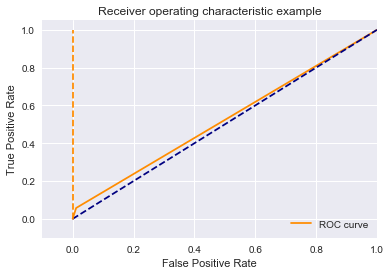

working on 2002   Q3   Q4
Started sample_svcg_2002.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.042956
loan_age                  0.126758
remng_mon_to_leg_matur   -0.094000
zero_bal_cd               0.066427
current_int_rte           0.028943
current_dupb              0.021178
mi_recoveries             0.055765
non_mi_recoveries         0.024608
expenses                 -0.067769
legal_costs              -0.077338
maint_pres_costs         -0.053401
taxes_and_insur          -0.049623
misc_expenses            -0.040083
actual_loss_calc         -0.070084
mod_cost                  0.007627
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
890027       52000.0         0                     360            0   
890028       52000.0         1                     359            0   
890029       52000.0         2                     358            0   
890030       52000.0         3                     357            0   
890031       52000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
890027             7.05             0            0.0                0.0   
890028             7.05             0            0.0                0.0   
890029             7.05             0            0.0                0.0   
890030             7.05             0            0.0                0.0   
890031             7.05             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
890027       0.0          0.0               0.0       

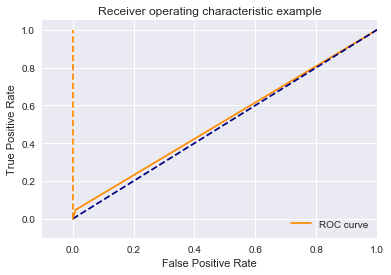

working on 2003   Q1   Q2
Started sample_svcg_2003.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.034227
loan_age                  0.122621
remng_mon_to_leg_matur   -0.095228
zero_bal_cd               0.074230
current_int_rte          -0.004061
current_dupb              0.019618
mi_recoveries             0.055226
non_mi_recoveries         0.030552
expenses                 -0.083519
legal_costs              -0.088339
maint_pres_costs         -0.065076
taxes_and_insur          -0.066757
misc_expenses            -0.071272
actual_loss_calc         -0.079921
mod_cost                  0.014336
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      110000.0         0                     360            0   
1      110000.0         1                     359            0   
2      110000.0         2                     358            0   
3      110000.0         3                     357            0   
4      110000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            6.125             0            0.0                0.0       0.0   
1            6.125             0            0.0                0.0       0.0   
2            6.125             0            0.0                0.0       0.0   
3            6.125             0            0.0                0.0       0.0   
4            6.125             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

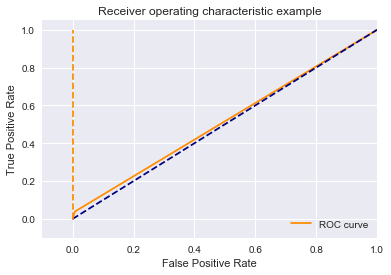

working on 2003   Q2   Q3
Started sample_svcg_2003.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.034145
loan_age                  0.118681
remng_mon_to_leg_matur   -0.077442
zero_bal_cd               0.079155
current_int_rte          -0.016733
current_dupb              0.019820
mi_recoveries             0.053697
non_mi_recoveries         0.039569
expenses                 -0.071619
legal_costs              -0.091944
maint_pres_costs         -0.059548
taxes_and_insur          -0.054462
misc_expenses            -0.012292
actual_loss_calc         -0.080766
mod_cost                  0.014010
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
810738      129000.0         0                     360            0   
810739      128000.0         1                     359            0   
810740      128000.0         2                     358            0   
810741      128000.0         3                     357            0   
810742      128000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
810738            5.625             0            0.0                0.0   
810739            5.625             0            0.0                0.0   
810740            5.625             0            0.0                0.0   
810741            5.625             0            0.0                0.0   
810742            5.625             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
810738       0.0          0.0               0.0       

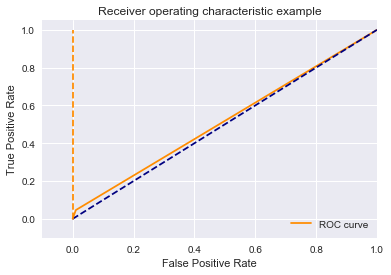

working on 2003   Q3   Q4
Started sample_svcg_2003.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.026990
loan_age                  0.113828
remng_mon_to_leg_matur   -0.065974
zero_bal_cd               0.074143
current_int_rte           0.008640
current_dupb              0.035953
mi_recoveries             0.052321
non_mi_recoveries         0.033255
expenses                 -0.075535
legal_costs              -0.082054
maint_pres_costs         -0.055989
taxes_and_insur          -0.057561
misc_expenses            -0.056725
actual_loss_calc         -0.075177
mod_cost                  0.011803
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1748044      131000.0         0                     360            0   
1748045      131000.0         1                     359            0   
1748046      131000.0         2                     358            0   
1748047      131000.0         3                     357            0   
1748048      130000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1748044            5.875             0            0.0                0.0   
1748045            5.875             0            0.0                0.0   
1748046            5.875             0            0.0                0.0   
1748047            5.875             0            0.0                0.0   
1748048            5.875             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1748044       0.0          0.0           

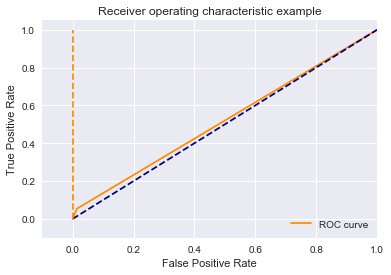

working on 2004   Q1   Q2
Started sample_svcg_2004.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.017540
loan_age                  0.132698
remng_mon_to_leg_matur   -0.090026
zero_bal_cd               0.080167
current_int_rte          -0.014363
current_dupb              0.008127
mi_recoveries             0.047561
non_mi_recoveries         0.024231
expenses                 -0.078577
legal_costs              -0.082381
maint_pres_costs         -0.062970
taxes_and_insur          -0.060155
misc_expenses            -0.036152
actual_loss_calc         -0.073961
mod_cost                  0.008067
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      170000.0         0                     360            0   
1      169000.0         1                     359            0   
2      169000.0         2                     358            0   
3      169000.0         3                     357            0   
4      169000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0             5.75             0            0.0                0.0       0.0   
1             5.75             0            0.0                0.0       0.0   
2             5.75             0            0.0                0.0       0.0   
3             5.75             0            0.0                0.0       0.0   
4             5.75             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

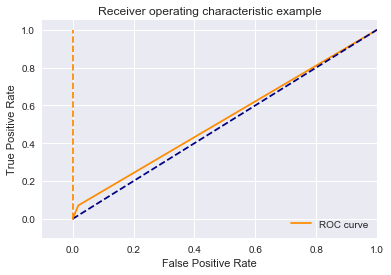

working on 2004   Q2   Q3
Started sample_svcg_2004.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.015643
loan_age                  0.151884
remng_mon_to_leg_matur   -0.088647
zero_bal_cd               0.076513
current_int_rte          -0.007183
current_dupb              0.004561
mi_recoveries             0.049157
non_mi_recoveries         0.023388
expenses                 -0.070866
legal_costs              -0.075072
maint_pres_costs         -0.058278
taxes_and_insur          -0.047964
misc_expenses            -0.047617
actual_loss_calc         -0.081163
mod_cost                  0.014682
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
917975      330000.0         0                     360            0   
917976      330000.0         1                     359            0   
917977      329000.0         2                     358            0   
917978      329000.0         3                     357            0   
917979      329000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
917975            5.375             0            0.0                0.0   
917976            5.375             0            0.0                0.0   
917977            5.375             0            0.0                0.0   
917978            5.375             0            0.0                0.0   
917979            5.375             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
917975       0.0          0.0               0.0       

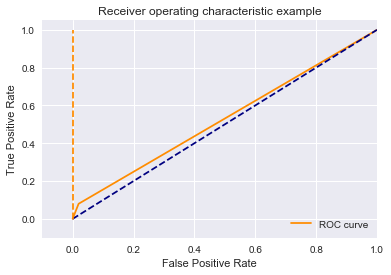

working on 2004   Q3   Q4
Started sample_svcg_2004.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.007914
loan_age                  0.152860
remng_mon_to_leg_matur   -0.079912
zero_bal_cd               0.081451
current_int_rte          -0.046878
current_dupb              0.020472
mi_recoveries             0.052214
non_mi_recoveries         0.024202
expenses                 -0.085021
legal_costs              -0.092339
maint_pres_costs         -0.064051
taxes_and_insur          -0.071486
misc_expenses            -0.049565
actual_loss_calc         -0.085070
mod_cost                  0.015651
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1812865      189000.0         0                     360            0   
1812866      189000.0         1                     359            0   
1812867      189000.0         2                     358            0   
1812868      188000.0         3                     357            0   
1812869      188000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1812865            6.875             0            0.0                0.0   
1812866            6.875             0            0.0                0.0   
1812867            6.875             0            0.0                0.0   
1812868            6.875             0            0.0                0.0   
1812869            6.875             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1812865       0.0          0.0           

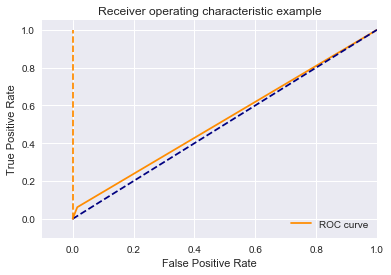

working on 2005   Q1   Q2
Started sample_svcg_2005.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.013046
loan_age                  0.150777
remng_mon_to_leg_matur    0.018246
zero_bal_cd               0.082250
current_int_rte          -0.024759
current_dupb              0.012682
mi_recoveries             0.044816
non_mi_recoveries         0.022754
expenses                 -0.082486
legal_costs              -0.087452
maint_pres_costs         -0.061489
taxes_and_insur          -0.063170
misc_expenses            -0.052228
actual_loss_calc         -0.088495
mod_cost                  0.013923
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0       62000.0         0                     360            0   
1       62000.0         1                     359            0   
2       62000.0         2                     358            0   
3       62000.0         3                     357            0   
4       62000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0             5.75             0            0.0                0.0       0.0   
1             5.75             0            0.0                0.0       0.0   
2             5.75             0            0.0                0.0       0.0   
3             5.75             0            0.0                0.0       0.0   
4             5.75             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

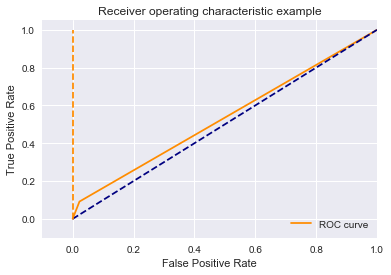

working on 2005   Q2   Q3
Started sample_svcg_2005.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.024475
loan_age                  0.148827
remng_mon_to_leg_matur    0.014219
zero_bal_cd               0.085735
current_int_rte          -0.033614
current_dupb              0.016949
mi_recoveries             0.050322
non_mi_recoveries         0.027793
expenses                 -0.086100
legal_costs              -0.097541
maint_pres_costs         -0.067074
taxes_and_insur          -0.070115
misc_expenses            -0.023228
actual_loss_calc         -0.092173
mod_cost                  0.011398
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
923079      150000.0         0                     360            0   
923080      150000.0         1                     359            0   
923081      149000.0         2                     358            0   
923082      149000.0         3                     357            0   
923083      149000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
923079             5.75             0            0.0                0.0   
923080             5.75             0            0.0                0.0   
923081             5.75             0            0.0                0.0   
923082             5.75             0            0.0                0.0   
923083             5.75             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
923079       0.0          0.0               0.0       

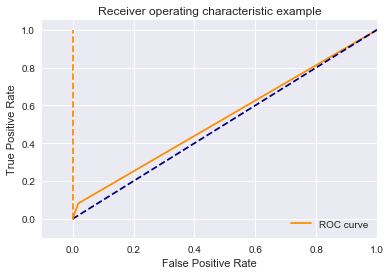

working on 2005   Q3   Q4
Started sample_svcg_2005.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.045276
loan_age                  0.148248
remng_mon_to_leg_matur    0.018113
zero_bal_cd               0.093676
current_int_rte          -0.041939
current_dupb              0.020184
mi_recoveries             0.049702
non_mi_recoveries         0.030320
expenses                 -0.088519
legal_costs              -0.101574
maint_pres_costs         -0.070188
taxes_and_insur          -0.069682
misc_expenses            -0.039970
actual_loss_calc         -0.100328
mod_cost                  0.014137
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1820544      135000.0         0                     360            0   
1820545      135000.0         1                     359            0   
1820546      135000.0         2                     358            0   
1820547      135000.0         3                     357            0   
1820548      134000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1820544            6.125             0            0.0                0.0   
1820545            6.125             0            0.0                0.0   
1820546            6.125             0            0.0                0.0   
1820547            6.125             0            0.0                0.0   
1820548            6.125             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1820544       0.0          0.0           

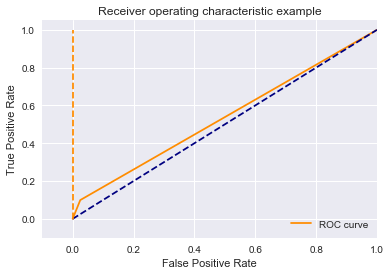

working on 2006   Q1   Q2
Started sample_svcg_2006.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.047751
loan_age                  0.184691
remng_mon_to_leg_matur    0.018291
zero_bal_cd               0.094599
current_int_rte          -0.063414
current_dupb              0.034067
mi_recoveries             0.049881
non_mi_recoveries         0.029434
expenses                 -0.090603
legal_costs              -0.103369
maint_pres_costs         -0.066981
taxes_and_insur          -0.076359
misc_expenses            -0.059631
actual_loss_calc         -0.100628
mod_cost                  0.017451
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      128000.0         0                     360            0   
1      128000.0         1                     359            0   
2      128000.0         2                     358            0   
3      127000.0         3                     357            0   
4      127000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            6.375             0            0.0                0.0       0.0   
1            6.375             0            0.0                0.0       0.0   
2            6.375             0            0.0                0.0       0.0   
3            6.375             0            0.0                0.0       0.0   
4            6.375             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

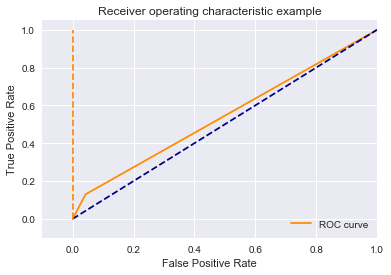

working on 2006   Q2   Q3
Started sample_svcg_2006.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.049951
loan_age                  0.189259
remng_mon_to_leg_matur    0.015018
zero_bal_cd               0.099142
current_int_rte          -0.061486
current_dupb              0.023920
mi_recoveries             0.050807
non_mi_recoveries         0.032201
expenses                 -0.092041
legal_costs              -0.108410
maint_pres_costs         -0.067398
taxes_and_insur          -0.081680
misc_expenses            -0.011238
actual_loss_calc         -0.106593
mod_cost                  0.016279
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
786949      268000.0         0                     360            0   
786950      268000.0         1                     359            0   
786951      268000.0         2                     358            0   
786952      267000.0         3                     357            0   
786953      267000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
786949              7.5             0            0.0                0.0   
786950              7.5             0            0.0                0.0   
786951              7.5             0            0.0                0.0   
786952              7.5             0            0.0                0.0   
786953              7.5             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
786949       0.0          0.0               0.0       

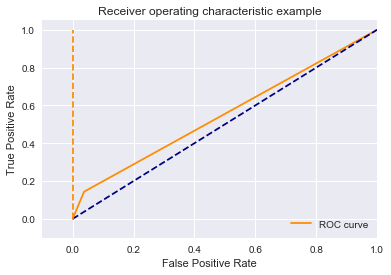

working on 2006   Q3   Q4
Started sample_svcg_2006.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.055162
loan_age                  0.185644
remng_mon_to_leg_matur    0.017948
zero_bal_cd               0.096454
current_int_rte          -0.069681
current_dupb              0.038936
mi_recoveries             0.050045
non_mi_recoveries         0.030667
expenses                 -0.092149
legal_costs              -0.106532
maint_pres_costs         -0.068064
taxes_and_insur          -0.073795
misc_expenses            -0.069238
actual_loss_calc         -0.102496
mod_cost                  0.017404
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1494959      118000.0         0                     360            0   
1494960      118000.0         1                     359            0   
1494961      118000.0         2                     358            0   
1494962      118000.0         3                     357            0   
1494963      118000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1494959            6.875             0            0.0                0.0   
1494960            6.875             0            0.0                0.0   
1494961            6.875             0            0.0                0.0   
1494962            6.875             0            0.0                0.0   
1494963            6.875             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1494959       0.0          0.0           

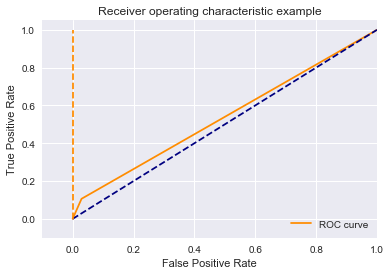

working on 2007   Q1   Q2
Started sample_svcg_2007.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.048452
loan_age                  0.158430
remng_mon_to_leg_matur    0.020419
zero_bal_cd               0.100688
current_int_rte          -0.054367
current_dupb              0.005094
mi_recoveries             0.052473
non_mi_recoveries         0.030632
expenses                 -0.092402
legal_costs              -0.104922
maint_pres_costs         -0.070002
taxes_and_insur          -0.074674
misc_expenses            -0.062043
actual_loss_calc         -0.101472
mod_cost                  0.015173
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      110000.0         0                     360            0   
1      110000.0         1                     359            0   
2      110000.0         2                     358            0   
3      110000.0         3                     357            0   
4      110000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            6.375             0            0.0                0.0       0.0   
1            6.375             0            0.0                0.0       0.0   
2            6.375             0            0.0                0.0       0.0   
3            6.375             0            0.0                0.0       0.0   
4            6.375             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

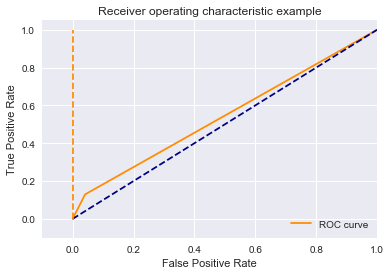

working on 2007   Q2   Q3
Started sample_svcg_2007.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.057273
loan_age                  0.148621
remng_mon_to_leg_matur    0.035230
zero_bal_cd               0.097981
current_int_rte          -0.045745
current_dupb              0.028938
mi_recoveries             0.057929
non_mi_recoveries         0.031308
expenses                 -0.083768
legal_costs              -0.100404
maint_pres_costs         -0.069488
taxes_and_insur          -0.054655
misc_expenses            -0.053972
actual_loss_calc         -0.094835
mod_cost                  0.014296
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
721209      219000.0         0                     360            0   
721210      219000.0         1                     359            0   
721211      219000.0         2                     358            0   
721212      219000.0         3                     357            0   
721213      218000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
721209            5.875             0            0.0                0.0   
721210            5.875             0            0.0                0.0   
721211            5.875             0            0.0                0.0   
721212            5.875             0            0.0                0.0   
721213            5.875             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
721209       0.0          0.0               0.0       

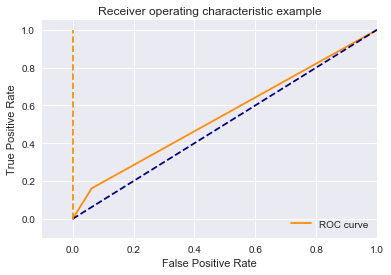

working on 2007   Q3   Q4
Started sample_svcg_2007.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.077670
loan_age                  0.148214
remng_mon_to_leg_matur    0.030551
zero_bal_cd               0.100100
current_int_rte          -0.051836
current_dupb              0.026777
mi_recoveries             0.065365
non_mi_recoveries         0.031122
expenses                 -0.092357
legal_costs              -0.095380
maint_pres_costs         -0.072184
taxes_and_insur          -0.075570
misc_expenses            -0.048623
actual_loss_calc         -0.099891
mod_cost                  0.014410
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1428891      256000.0         0                     360            0   
1428892      256000.0         1                     359            0   
1428893      256000.0         2                     358            0   
1428894      256000.0         3                     357            0   
1428895      255000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1428891             6.75             0            0.0                0.0   
1428892             6.75             0            0.0                0.0   
1428893             6.75             0            0.0                0.0   
1428894             6.75             0            0.0                0.0   
1428895             6.75             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1428891       0.0          0.0           

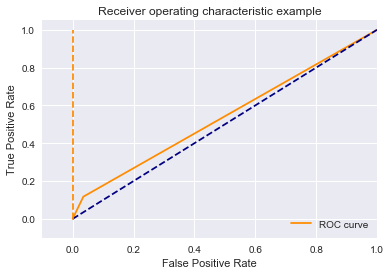

working on 2008   Q1   Q2
Started sample_svcg_2008.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.050878
loan_age                  0.140267
remng_mon_to_leg_matur    0.051672
zero_bal_cd               0.092840
current_int_rte           0.014355
current_dupb              0.033035
mi_recoveries             0.057120
non_mi_recoveries         0.033552
expenses                 -0.088797
legal_costs              -0.101085
maint_pres_costs         -0.068039
taxes_and_insur          -0.071423
misc_expenses            -0.070337
actual_loss_calc         -0.094078
mod_cost                  0.014298
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      192000.0         0                     360            0   
1      192000.0         1                     359            0   
2      191000.0         2                     358            0   
3      191000.0         3                     357            0   
4      191000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0             6.25             0            0.0                0.0       0.0   
1             6.25             0            0.0                0.0       0.0   
2             6.25             0            0.0                0.0       0.0   
3             6.25             0            0.0                0.0       0.0   
4             6.25             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

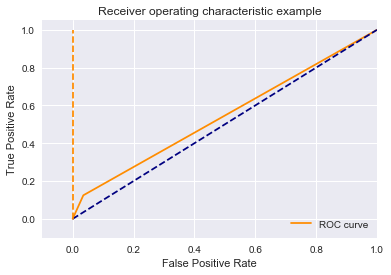

working on 2008   Q2   Q3
Started sample_svcg_2008.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.049715
loan_age                  0.130354
remng_mon_to_leg_matur    0.050412
zero_bal_cd               0.083138
current_int_rte           0.021240
current_dupb              0.029364
mi_recoveries             0.053474
non_mi_recoveries         0.028856
expenses                 -0.078579
legal_costs              -0.096663
maint_pres_costs         -0.063509
taxes_and_insur          -0.068682
misc_expenses            -0.006484
actual_loss_calc         -0.087792
mod_cost                  0.016720
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
624091      124000.0         0                     360            0   
624092      124000.0         1                     359            0   
624093      124000.0         2                     358            0   
624094      124000.0         3                     357            0   
624095      123000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
624091             5.75             0            0.0                0.0   
624092             5.75             0            0.0                0.0   
624093             5.75             0            0.0                0.0   
624094             5.75             0            0.0                0.0   
624095             5.75             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
624091       0.0          0.0               0.0       

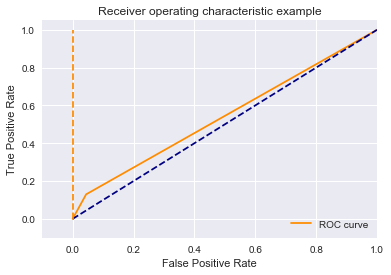

working on 2008   Q3   Q4
Started sample_svcg_2008.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.077625
loan_age                  0.124686
remng_mon_to_leg_matur    0.048214
zero_bal_cd               0.082180
current_int_rte          -0.017195
current_dupb              0.022036
mi_recoveries             0.051927
non_mi_recoveries         0.028412
expenses                 -0.077885
legal_costs              -0.095181
maint_pres_costs         -0.068493
taxes_and_insur          -0.070471
misc_expenses            -0.002231
actual_loss_calc         -0.087745
mod_cost                  0.014974
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1205036      195000.0         0                     360            0   
1205037      195000.0         1                     359            0   
1205038      195000.0         2                     358            0   
1205039      195000.0         3                     357            0   
1205040      194000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1205036              7.0             0            0.0                0.0   
1205037              7.0             0            0.0                0.0   
1205038              7.0             0            0.0                0.0   
1205039              7.0             0            0.0                0.0   
1205040              7.0             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1205036       0.0          0.0           

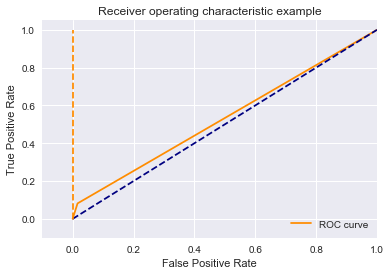

working on 2009   Q1   Q2
Started sample_svcg_2009.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.005810
loan_age                  0.064168
remng_mon_to_leg_matur    0.022911
zero_bal_cd               0.057251
current_int_rte           0.055504
current_dupb              0.053083
mi_recoveries             0.041416
non_mi_recoveries         0.029156
expenses                 -0.059851
legal_costs              -0.092293
maint_pres_costs         -0.064238
taxes_and_insur          -0.052587
misc_expenses             0.006007
actual_loss_calc         -0.090773
mod_cost                  0.027051
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      200000.0         0                     360            0   
1      200000.0         1                     359            0   
2      200000.0         2                     358            0   
3      199000.0         3                     357            0   
4      199000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0              5.0             0            0.0                0.0       0.0   
1              5.0             0            0.0                0.0       0.0   
2              5.0             0            0.0                0.0       0.0   
3              5.0             0            0.0                0.0       0.0   
4              5.0             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

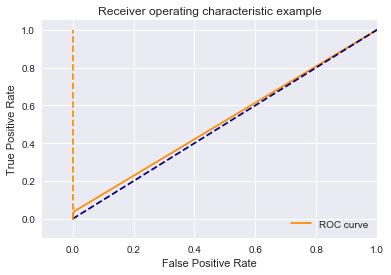

working on 2009   Q2   Q3
Started sample_svcg_2009.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.005275
loan_age                  0.048696
remng_mon_to_leg_matur    0.020111
zero_bal_cd               0.035262
current_int_rte           0.052582
current_dupb              0.032050
mi_recoveries             0.022540
non_mi_recoveries         0.015634
expenses                 -0.063672
legal_costs              -0.073649
maint_pres_costs         -0.049697
taxes_and_insur          -0.051339
misc_expenses            -0.046834
actual_loss_calc         -0.066046
mod_cost                  0.005005
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
607945      412000.0         0                     360            0   
607946      411000.0         1                     359            0   
607947      411000.0         2                     358            0   
607948      410000.0         3                     357            0   
607949      410000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
607945            4.625             0            0.0                0.0   
607946            4.625             0            0.0                0.0   
607947            4.625             0            0.0                0.0   
607948            4.625             0            0.0                0.0   
607949            4.625             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
607945       0.0          0.0               0.0       

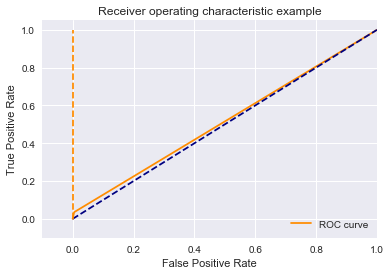

working on 2009   Q3   Q4
Started sample_svcg_2009.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.011874
loan_age                  0.058443
remng_mon_to_leg_matur    0.013871
zero_bal_cd               0.030537
current_int_rte           0.038152
current_dupb              0.018730
mi_recoveries             0.032714
non_mi_recoveries         0.040176
expenses                 -0.063085
legal_costs              -0.063719
maint_pres_costs         -0.051018
taxes_and_insur          -0.057047
misc_expenses            -0.043879
actual_loss_calc         -0.059014
mod_cost                  0.019257
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1267541       79000.0         0                     360            0   
1267542       79000.0         1                     359            0   
1267543       79000.0         2                     358            0   
1267544       79000.0         3                     357            0   
1267545       79000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1267541            4.875             0            0.0                0.0   
1267542            4.875             0            0.0                0.0   
1267543            4.875             0            0.0                0.0   
1267544            4.875             0            0.0                0.0   
1267545            4.875             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1267541       0.0          0.0           

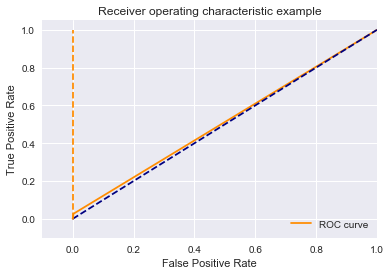

working on 2010   Q1   Q2
Started sample_svcg_2010.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.000318
loan_age                  0.051242
remng_mon_to_leg_matur    0.029984
zero_bal_cd               0.037126
current_int_rte           0.052498
current_dupb              0.056825
mi_recoveries             0.023637
non_mi_recoveries         0.032851
expenses                 -0.075076
legal_costs              -0.076183
maint_pres_costs         -0.055078
taxes_and_insur          -0.061020
misc_expenses            -0.047617
actual_loss_calc         -0.074581
mod_cost                  0.015889
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      137000.0         0                     360            0   
1      137000.0         1                     359            0   
2      137000.0         2                     358            0   
3      136000.0         3                     357            0   
4      136000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            4.875             0            0.0                0.0       0.0   
1            4.875             0            0.0                0.0       0.0   
2            4.875             0            0.0                0.0       0.0   
3            4.875             0            0.0                0.0       0.0   
4            4.875             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

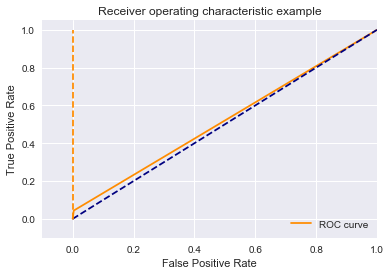

working on 2010   Q2   Q3
Started sample_svcg_2010.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.001403
loan_age                  0.053456
remng_mon_to_leg_matur    0.025608
zero_bal_cd               0.022782
current_int_rte           0.044619
current_dupb              0.001410
mi_recoveries             0.025334
non_mi_recoveries         0.040780
expenses                 -0.051277
legal_costs              -0.055234
maint_pres_costs         -0.041056
taxes_and_insur          -0.037990
misc_expenses            -0.054639
actual_loss_calc         -0.048221
mod_cost                  0.008947
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
591381      193000.0         0                     360            0   
591382      192000.0         1                     359            0   
591383      192000.0         2                     358            0   
591384      192000.0         3                     357            0   
591385      191000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
591381            5.875             0            0.0                0.0   
591382            5.875             0            0.0                0.0   
591383            5.875             0            0.0                0.0   
591384            5.875             0            0.0                0.0   
591385            5.875             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
591381       0.0          0.0               0.0       

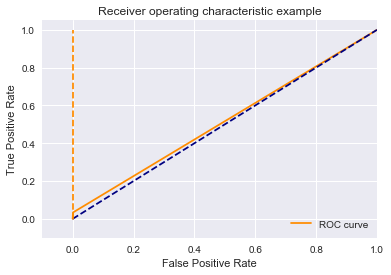

working on 2010   Q3   Q4
Started sample_svcg_2010.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.007581
loan_age                  0.043243
remng_mon_to_leg_matur    0.033000
zero_bal_cd               0.025071
current_int_rte           0.046929
current_dupb              0.045993
mi_recoveries             0.027392
non_mi_recoveries         0.019586
expenses                 -0.061811
legal_costs              -0.065177
maint_pres_costs         -0.051030
taxes_and_insur          -0.053221
misc_expenses            -0.049861
actual_loss_calc         -0.062362
mod_cost                  0.025872
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1164863      233000.0         0                     360            0   
1164864      232000.0         1                     359            0   
1164865      232000.0         2                     358            0   
1164866      231000.0         3                     357            0   
1164867      231000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1164863            4.625             0            0.0                0.0   
1164864            4.625             0            0.0                0.0   
1164865            4.625             0            0.0                0.0   
1164866            4.625             0            0.0                0.0   
1164867            4.625             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1164863       0.0          0.0           

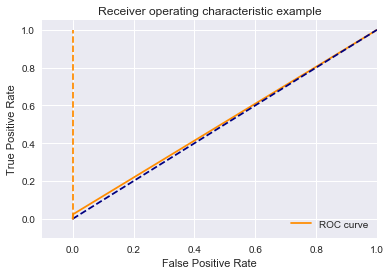

working on 2011   Q1   Q2
Started sample_svcg_2011.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.002545
loan_age                  0.041421
remng_mon_to_leg_matur    0.023044
zero_bal_cd               0.023481
current_int_rte           0.044956
current_dupb              0.003830
mi_recoveries             0.036406
non_mi_recoveries         0.052045
expenses                 -0.056322
legal_costs              -0.053891
maint_pres_costs         -0.039801
taxes_and_insur          -0.047772
misc_expenses            -0.052781
actual_loss_calc         -0.047169
mod_cost                  0.016477
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      123000.0         0                     360            0   
1      123000.0         1                     359            0   
2      122000.0         2                     358            0   
3      122000.0         3                     357            0   
4      122000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0             4.75             0            0.0                0.0       0.0   
1             4.75             0            0.0                0.0       0.0   
2             4.75             0            0.0                0.0       0.0   
3             4.75             0            0.0                0.0       0.0   
4             4.75             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

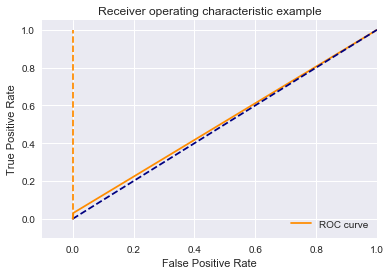

working on 2011   Q2   Q3
Started sample_svcg_2011.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.007001
loan_age                  0.048997
remng_mon_to_leg_matur    0.020599
zero_bal_cd               0.011367
current_int_rte           0.045161
current_dupb                   NaN
mi_recoveries             0.020769
non_mi_recoveries         0.041171
expenses                 -0.039491
legal_costs              -0.044813
maint_pres_costs         -0.022235
taxes_and_insur          -0.042507
misc_expenses            -0.037536
actual_loss_calc         -0.032593
mod_cost                  0.025123
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
556493       54000.0         0                     360            0   
556494       54000.0         1                     359            0   
556495       54000.0         2                     358            0   
556496       54000.0         3                     357            0   
556497       54000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
556493              5.5             0            0.0                0.0   
556494              5.5             0            0.0                0.0   
556495              5.5             0            0.0                0.0   
556496              5.5             0            0.0                0.0   
556497              5.5             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
556493       0.0          0.0               0.0       

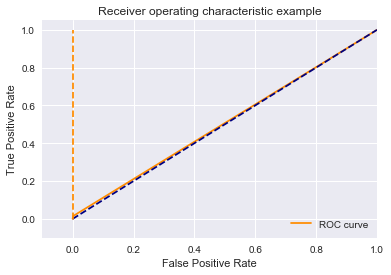

working on 2011   Q3   Q4
Started sample_svcg_2011.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.006778
loan_age                  0.031637
remng_mon_to_leg_matur    0.029328
zero_bal_cd               0.011911
current_int_rte           0.039309
current_dupb                   NaN
mi_recoveries             0.022401
non_mi_recoveries         0.030272
expenses                 -0.040248
legal_costs              -0.040852
maint_pres_costs         -0.037443
taxes_and_insur          -0.039126
misc_expenses            -0.043497
actual_loss_calc         -0.041130
mod_cost                  0.018469
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1066802      212000.0         0                     360            0   
1066803      212000.0         1                     359            0   
1066804      211000.0         2                     358            0   
1066805      211000.0         3                     357            0   
1066806      211000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1066802            4.625             0            0.0                0.0   
1066803            4.625             0            0.0                0.0   
1066804            4.625             0            0.0                0.0   
1066805            4.625             0            0.0                0.0   
1066806            4.625             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1066802       0.0          0.0           

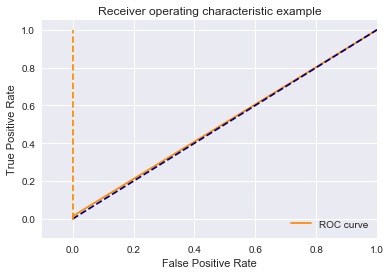

working on 2012   Q1   Q2
Started sample_svcg_2012.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.009094
loan_age                  0.019593
remng_mon_to_leg_matur    0.023400
zero_bal_cd               0.009740
current_int_rte           0.042858
current_dupb                   NaN
mi_recoveries             0.026057
non_mi_recoveries         0.027727
expenses                 -0.026954
legal_costs              -0.026057
maint_pres_costs         -0.026356
taxes_and_insur          -0.026887
misc_expenses            -0.036317
actual_loss_calc         -0.026057
mod_cost                  0.000068
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      103000.0         0                     360            0   
1      103000.0         1                     359            0   
2      103000.0         2                     358            0   
3      102000.0         3                     357            0   
4      102000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0              4.0             0            0.0                0.0       0.0   
1              4.0             0            0.0                0.0       0.0   
2              4.0             0            0.0                0.0       0.0   
3              4.0             0            0.0                0.0       0.0   
4              4.0             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

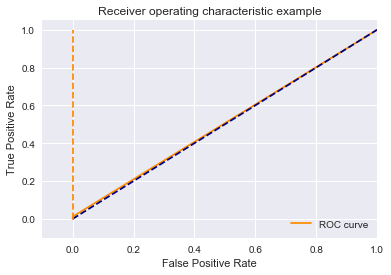

working on 2012   Q2   Q3
Started sample_svcg_2012.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.008980
loan_age                  0.020880
remng_mon_to_leg_matur    0.016230
zero_bal_cd               0.021174
current_int_rte           0.029914
current_dupb              0.007723
mi_recoveries                  NaN
non_mi_recoveries         0.032144
expenses                 -0.042536
legal_costs              -0.045372
maint_pres_costs         -0.044866
taxes_and_insur           0.005865
misc_expenses            -0.048259
actual_loss_calc         -0.040870
mod_cost                 -0.004552
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
560533      212000.0         0                     360            0   
560534      212000.0         1                     359            0   
560535      211000.0         2                     358            0   
560536      211000.0         3                     357            0   
560537      211000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
560533             4.25             0            0.0                0.0   
560534             4.25             0            0.0                0.0   
560535             4.25             0            0.0                0.0   
560536             4.25             0            0.0                0.0   
560537             4.25             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
560533       0.0          0.0               0.0       

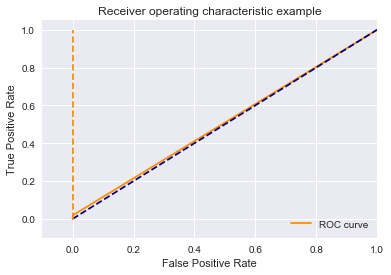

working on 2012   Q3   Q4
Started sample_svcg_2012.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.010173
loan_age                  0.019562
remng_mon_to_leg_matur    0.015307
zero_bal_cd               0.006405
current_int_rte           0.034292
current_dupb                   NaN
mi_recoveries                  NaN
non_mi_recoveries              NaN
expenses                       NaN
legal_costs                    NaN
maint_pres_costs               NaN
taxes_and_insur                NaN
misc_expenses                  NaN
actual_loss_calc               NaN
mod_cost                 -0.003152
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1125377      135000.0         0                     360            0   
1125378      135000.0         1                     359            0   
1125379      135000.0         2                     358            0   
1125380      135000.0         3                     357            0   
1125381      134000.0         4                     356            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1125377              4.5             0            0.0                0.0   
1125378              4.5             0            0.0                0.0   
1125379              4.5             0            0.0                0.0   
1125380              4.5             0            0.0                0.0   
1125381              4.5             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1125377       0.0          0.0           

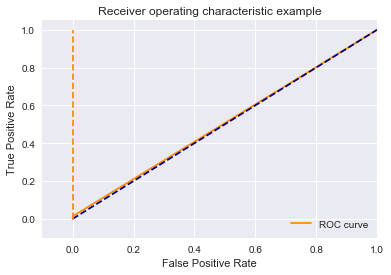

working on 2013   Q1   Q2
Started sample_svcg_2013.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.009109
loan_age                  0.016956
remng_mon_to_leg_matur    0.008432
zero_bal_cd               0.011497
current_int_rte           0.020268
current_dupb                   NaN
mi_recoveries                  NaN
non_mi_recoveries         0.027468
expenses                 -0.037407
legal_costs              -0.038846
maint_pres_costs         -0.027468
taxes_and_insur          -0.035723
misc_expenses            -0.033676
actual_loss_calc         -0.028574
mod_cost                 -0.027468
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      148000.0         0                     360            0   
1      148000.0         1                     359            0   
2      148000.0         2                     358            0   
3      148000.0         3                     357            0   
4      148000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0              3.6             0            0.0                0.0       0.0   
1              3.6             0            0.0                0.0       0.0   
2              3.6             0            0.0                0.0       0.0   
3              3.6             0            0.0                0.0       0.0   
4              3.6             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

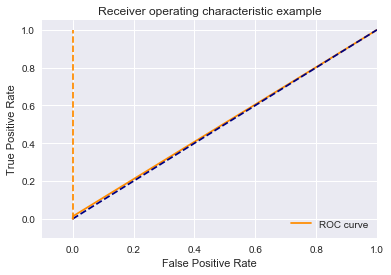

working on 2013   Q2   Q3
Started sample_svcg_2013.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.006613
loan_age                  0.022043
remng_mon_to_leg_matur    0.016717
zero_bal_cd               0.021971
current_int_rte           0.024242
current_dupb                   NaN
mi_recoveries             0.024436
non_mi_recoveries         0.024441
expenses                 -0.042324
legal_costs              -0.033458
maint_pres_costs         -0.042369
taxes_and_insur          -0.027226
misc_expenses            -0.043124
actual_loss_calc         -0.032270
mod_cost                 -0.024256
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
519833       75000.0         0                     360            0   
519834       75000.0         1                     359            0   
519835       75000.0         2                     358            0   
519836       75000.0         3                     357            0   
519837       74000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
519833              4.0             0            0.0                0.0   
519834              4.0             0            0.0                0.0   
519835              4.0             0            0.0                0.0   
519836              4.0             0            0.0                0.0   
519837              4.0             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
519833       0.0          0.0               0.0       

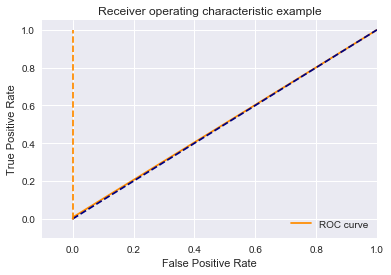

working on 2013   Q3   Q4
Started sample_svcg_2013.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.001058
loan_age                  0.023656
remng_mon_to_leg_matur    0.015531
zero_bal_cd               0.006986
current_int_rte           0.029724
current_dupb              0.055842
mi_recoveries             0.024191
non_mi_recoveries         0.037199
expenses                 -0.036990
legal_costs              -0.038754
maint_pres_costs         -0.024875
taxes_and_insur          -0.041331
misc_expenses            -0.031917
actual_loss_calc         -0.007374
mod_cost                  0.009107
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


         current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
1006550      375000.0         0                     312            0   
1006551      375000.0         1                     311            0   
1006552      374000.0         2                     310            0   
1006553      373000.0         3                     309            0   
1006554      372000.0         4                     308            0   

         current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
1006550            3.875             0            0.0                0.0   
1006551            3.875             0            0.0                0.0   
1006552            3.875             0            0.0                0.0   
1006553            3.875             0            0.0                0.0   
1006554            3.875             0            0.0                0.0   

         expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
1006550       0.0          0.0           

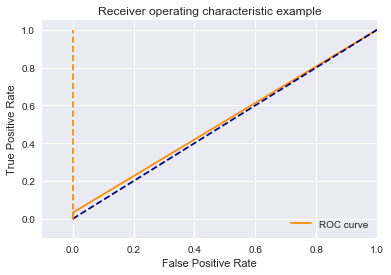

working on 2014   Q1   Q2
Started sample_svcg_2014.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.008827
loan_age                  0.036748
remng_mon_to_leg_matur    0.013845
zero_bal_cd               0.005496
current_int_rte           0.027371
current_dupb                   NaN
mi_recoveries             0.021531
non_mi_recoveries         0.025608
expenses                 -0.030967
legal_costs              -0.025174
maint_pres_costs         -0.030545
taxes_and_insur          -0.022771
misc_expenses            -0.024688
actual_loss_calc         -0.025875
mod_cost                  0.036526
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0       76000.0         0                     360            0   
1       76000.0         1                     359            0   
2       76000.0         2                     358            0   
3       76000.0         3                     357            0   
4       76000.0         4                     356            0   

   current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  expenses  \
0            4.625             0            0.0                0.0       0.0   
1            4.625             0            0.0                0.0       0.0   
2            4.625             0            0.0                0.0       0.0   
3            4.625             0            0.0                0.0       0.0   
4            4.625             0            0.0                0.0       0.0   

   legal_costs  maint_pres_costs  taxes_and_insur  misc_expenses  \
0          0.0               0.0              0.0     

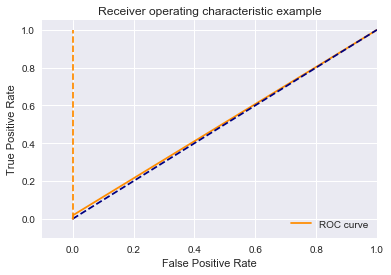

working on 2014   Q2   Q3
Started sample_svcg_2014.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.003675
loan_age                  0.038741
remng_mon_to_leg_matur    0.013874
zero_bal_cd               0.007207
current_int_rte           0.036878
current_dupb             -0.000135
mi_recoveries                  NaN
non_mi_recoveries         0.022254
expenses                 -0.031158
legal_costs              -0.029223
maint_pres_costs         -0.022312
taxes_and_insur          -0.024712
misc_expenses             0.000304
actual_loss_calc         -0.030501
mod_cost                  0.011927
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
355197      200000.0         0                     360            0   
355198      200000.0         1                     359            0   
355199      199000.0         2                     358            0   
355200      199000.0         3                     357            0   
355201      198000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
355197              4.5             0            0.0                0.0   
355198              4.5             0            0.0                0.0   
355199              4.5             0            0.0                0.0   
355200              4.5             0            0.0                0.0   
355201              4.5             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
355197       0.0          0.0               0.0       

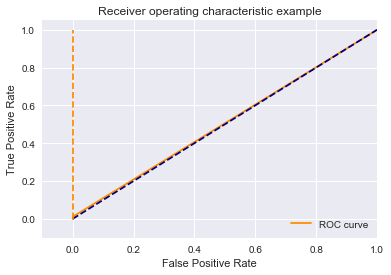

working on 2014   Q3   Q4
Started sample_svcg_2014.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb              0.003573
loan_age                  0.035379
remng_mon_to_leg_matur    0.013472
zero_bal_cd               0.003744
current_int_rte           0.036935
current_dupb              0.013941
mi_recoveries                  NaN
non_mi_recoveries              NaN
expenses                       NaN
legal_costs                    NaN
maint_pres_costs               NaN
taxes_and_insur                NaN
misc_expenses                  NaN
actual_loss_calc               NaN
mod_cost                  0.015441
delinquent                1.000000
Name: delinquent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
687328       49000.0         0                     360            0   
687329       49000.0         1                     359            0   
687330       49000.0         2                     358            0   
687331       49000.0         3                     357            0   
687332       49000.0         4                     356            0   

        current_int_rte  current_dupb  mi_recoveries  non_mi_recoveries  \
687328             4.75             0            0.0                0.0   
687329             4.75             0            0.0                0.0   
687330             4.75             0            0.0                0.0   
687331             4.75             0            0.0                0.0   
687332             4.75             0            0.0                0.0   

        expenses  legal_costs  maint_pres_costs  taxes_and_insur  \
687328       0.0          0.0               0.0       

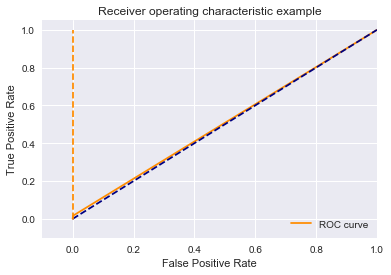

working on 2015   Q1   Q2
Started sample_svcg_2015.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.009846
loan_age                  0.020605
remng_mon_to_leg_matur    0.001609
zero_bal_cd               0.006404
current_int_rte           0.020445
current_dupb                   NaN
mi_recoveries                  NaN
non_mi_recoveries              NaN
expenses                       NaN
legal_costs                    NaN
maint_pres_costs               NaN
taxes_and_insur                NaN
misc_expenses                  NaN
actual_loss_calc               NaN
mod_cost                 -0.000104
delinquent                1.000000
Name: delinquent, dtype: float64
   current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
0      115000.0         0                     180            0   
1      115000.0         1                     179            0   
2      114000.0         2                     178            0   
3           0.0         3  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         226303          146

result    1         753          0

Accuracy: 99.6043168634


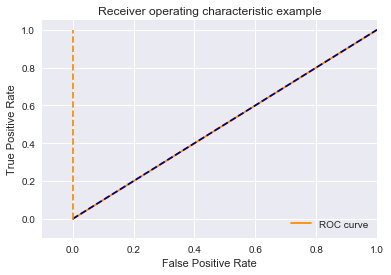

working on 2015   Q2   Q3
Started sample_svcg_2015.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.005074
loan_age                  0.025860
remng_mon_to_leg_matur    0.002929
zero_bal_cd               0.020941
current_int_rte           0.024094
current_dupb                   NaN
mi_recoveries                  NaN
non_mi_recoveries         0.044190
expenses                 -0.050743
legal_costs              -0.051306
maint_pres_costs         -0.050622
taxes_and_insur          -0.050668
misc_expenses            -0.037534
actual_loss_calc         -0.050281
mod_cost                       NaN
delinquent                1.000000
Name: delinquent, dtype: float64
        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
258976      214000.0         0                     360            0   
258977      214000.0         1                     359            0   
258978      214000.0         2                     358            0   
258979 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         190129          197

result    1         649          1

Accuracy: 99.5570123995


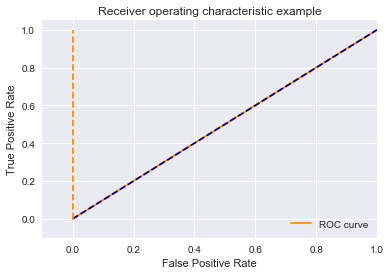

working on 2015   Q3   Q4
Started sample_svcg_2015.txt
DataFrame creation started!!
DataFrame created!!
Completed!!
current_aupb             -0.001599
loan_age                  0.022462
remng_mon_to_leg_matur    0.008419
zero_bal_cd               0.003265
current_int_rte           0.025741
current_dupb                   NaN
mi_recoveries                  NaN
non_mi_recoveries              NaN
expenses                       NaN
legal_costs                    NaN
maint_pres_costs               NaN
taxes_and_insur                NaN
misc_expenses                  NaN
actual_loss_calc               NaN
mod_cost                       NaN
delinquent                1.000000
Name: delinquent, dtype: float64
        current_aupb  loan_age  remng_mon_to_leg_matur  zero_bal_cd  \
486178       95000.0         0                     180            0   
486179       95000.0         1                     179            0   
486180       95000.0         2                     178            0   
486181 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         155545          110

result    1         512          0

Accuracy: 99.6017084275


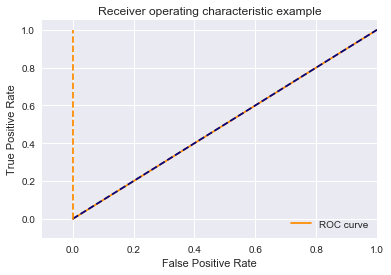

In [292]:
calculateMatrix()